<a href="https://colab.research.google.com/github/jaminiv/Credit_risk_assessment_by_loan_status_prediction/blob/main/Credit_risk_assessment_by_loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Upload dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


### Dataset Details

person_age: Age of the individual applying for the loan.<br><br>
person_income: Annual income of the individual.<br><br>
person_home_ownership: Type of home ownership of the individual.<br>
rent: The individual is currently renting a property.<br>
mortgage: The individual has a mortgage on the property they own.<br>
own: The individual owns their home outright.<br>
other: Other categories of home ownership that may be specific to the dataset.<br><br>
person_emp_length: Employment length of the individual in years.<br><br>
loan_intent: The intent behind the loan application.<br><br>
loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.<br>
A: The borrower has a high creditworthiness, indicating low risk.<br>
B: The borrower is relatively low-risk, but not as creditworthy as Grade A.<br>
C: The borrower's creditworthiness is moderate.<br>
D: The borrower is considered to have higher risk compared to previous grades.<br>
E: The borrower's creditworthiness is lower, indicating a higher risk.<br>
F: The borrower poses a significant credit risk.<br>
G: The borrower's creditworthiness is the lowest, signifying the highest risk.<br><br>
loan_amnt: The loan amount requested by the individual.<br><br>
loan_int_rate: The interest rate associated with the loan.<br><br>
loan_status: Loan status, where 0 indicates non-default and 1 indicates default.<br>
0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.<br>
1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.<br>
loan_percent_income: The percentage of income represented by the loan amount.<br><br>
cb_person_default_on_file: Historical default of the individual as per credit bureau records.<br>
Y: The individual has a history of defaults on their credit file.
N: The individual does not have any history of defaults.<br><br>
cb_preson_cred_hist_length: The length of credit history for the individual.

###Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Read Dataset

In [ ]:
df = pd.read_csv("credit_risk_dataset.csv")

In [ ]:
df # show df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df.head() # show first 5 rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.tail() # show last 5 rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


### Data Sanity Check

In [ ]:
df.shape # show shape of df

(32581, 12)

In [ ]:
df.info() # show info about df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isnull().sum() # show null values

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
# show null/missing values in percentage
total_num_of_row = df.shape[0] # get total number of rows
missing_value_count = df.isnull().sum() # get total number of missing values
missing_value_in_percentage = missing_value_count/total_num_of_row * 100 # get missing values in percentage
missing_value_in_percentage # show

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


In [ ]:
# check duplicated values
df.duplicated().sum()

165

In [ ]:
# check unique values
for column in df.select_dtypes(include="object").columns:
    print(f"{column}: {df[column].unique()}\n")

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']

cb_person_default_on_file: ['Y' 'N']



In [ ]:
# check garbage values (unique value and its frequency)
for column in df.select_dtypes(include="object").columns:
    print(f"{df[column].value_counts()}\n")

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64



### Exploratory Data Analysis(EDA)

In [ ]:
# Perform the statistical analysis
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.describe(include="object") # Perform the statistical analysis on object column

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


####Distrubution of numerical data

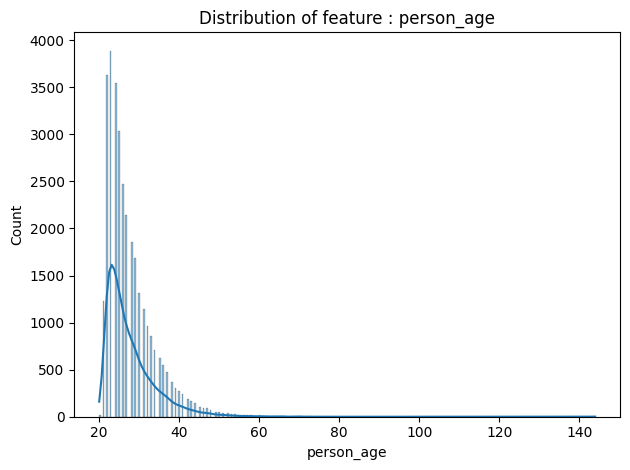

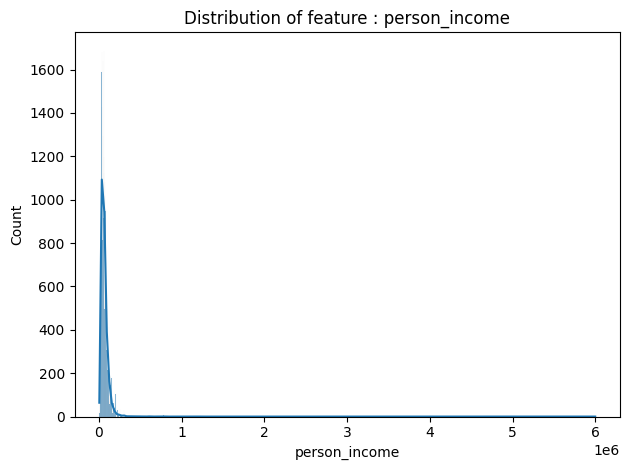

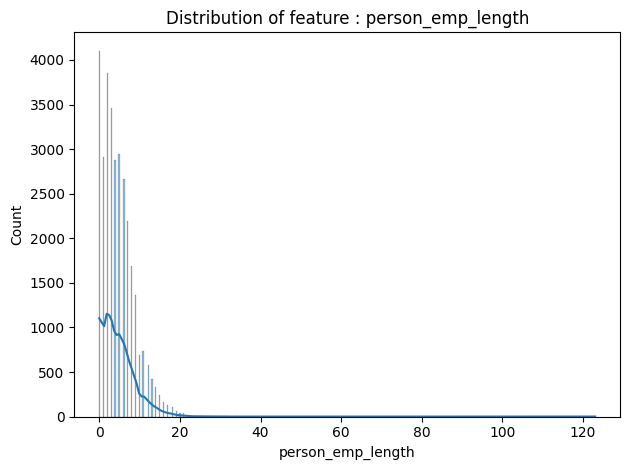

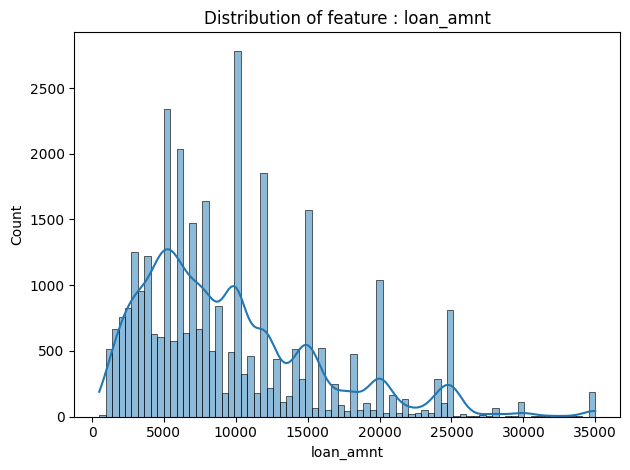

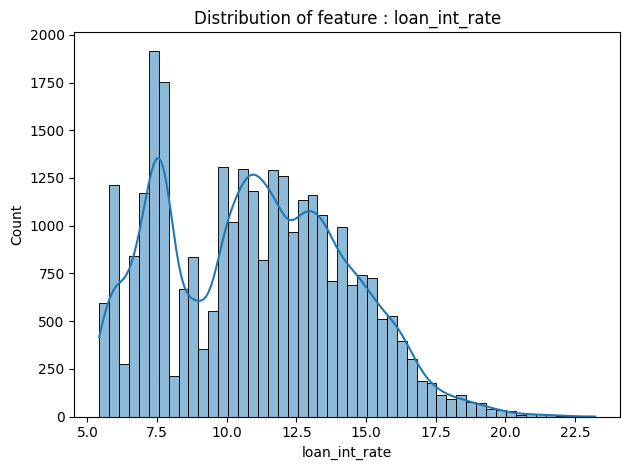

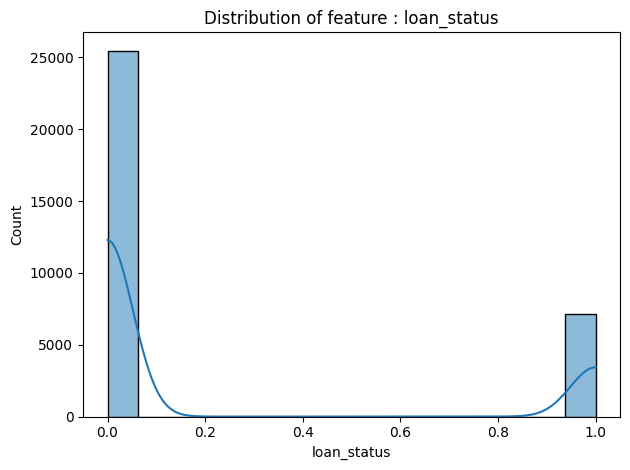

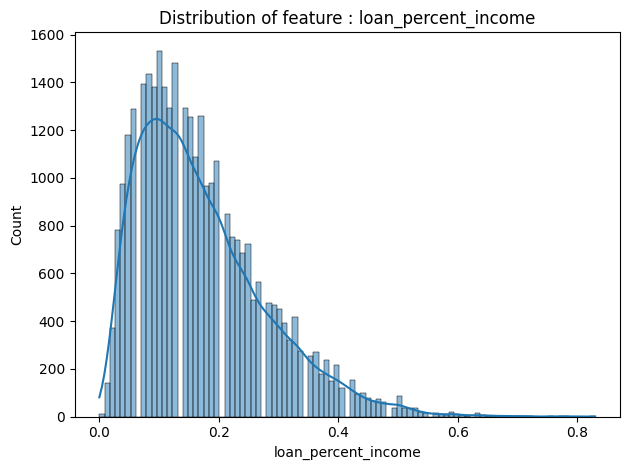

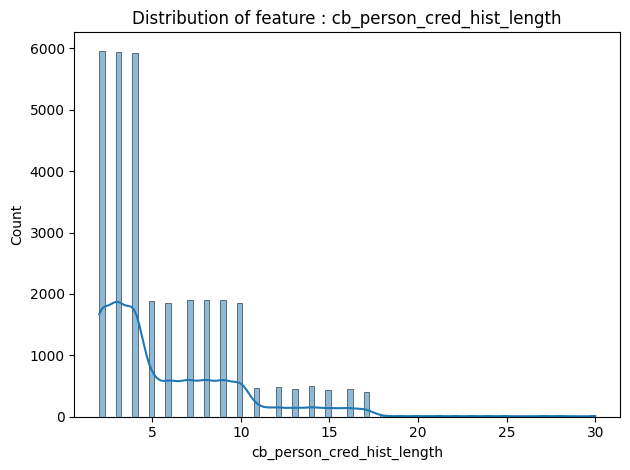

In [ ]:
# draw histplot for every numerical column to see distrubution of data
for column in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Distribution of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

####Distribution of categorical data

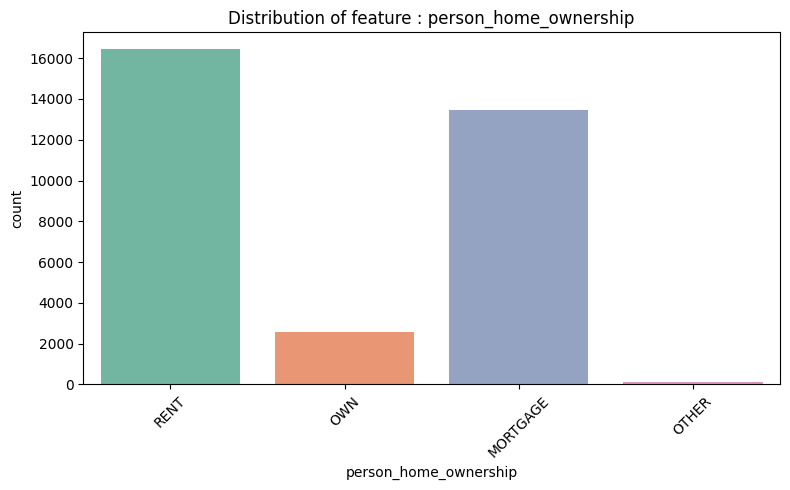

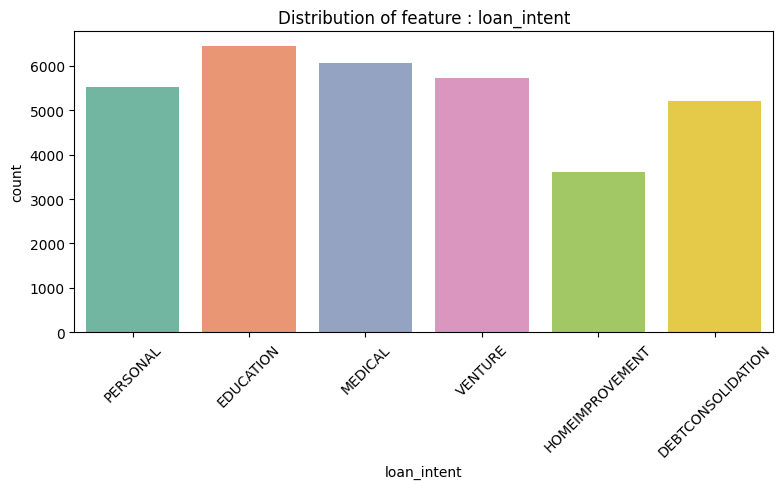

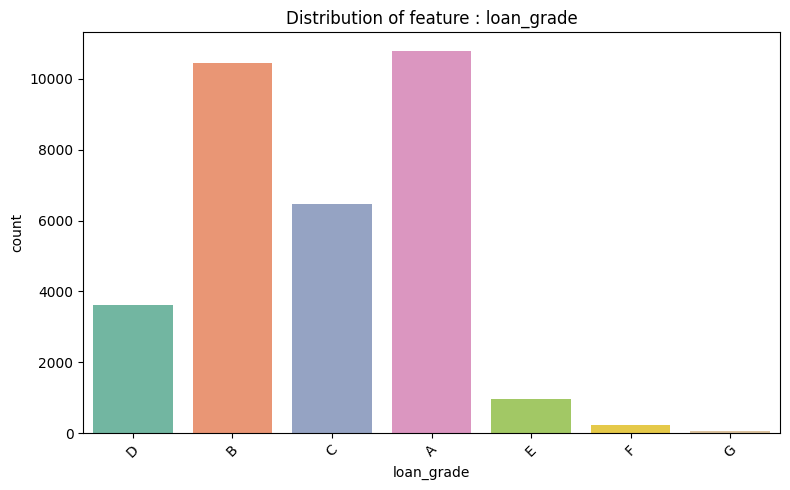

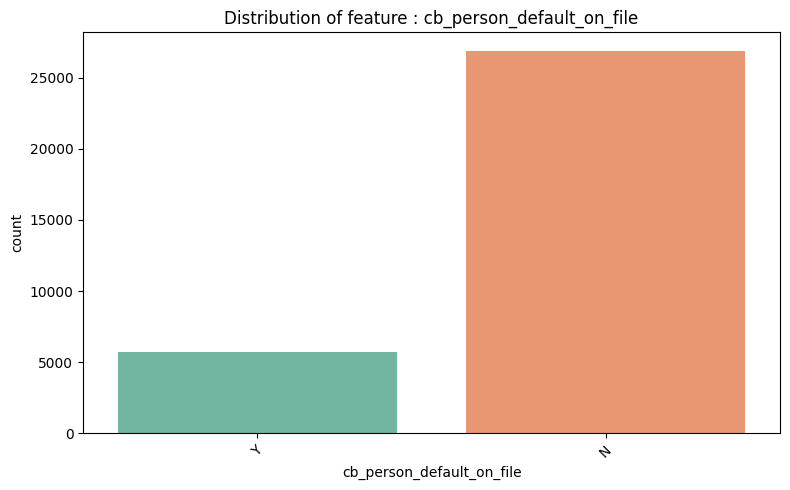

In [ ]:
#draw count plot to see distribution of categorical data
for column in df.select_dtypes(include="object").columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=column, hue = column, palette="Set2")
    plt.title(f"Distribution of feature : {column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")

####Outlier detection



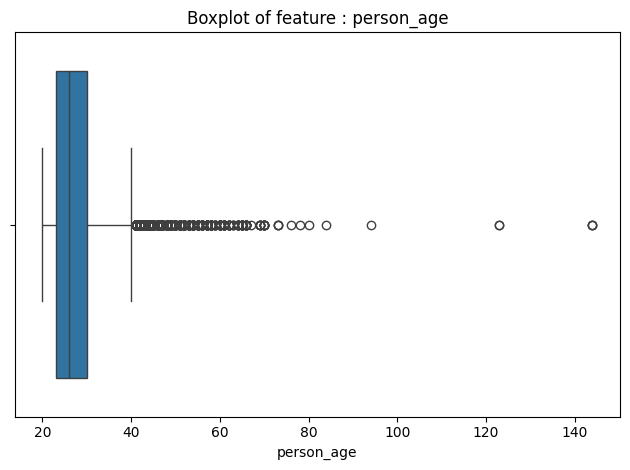

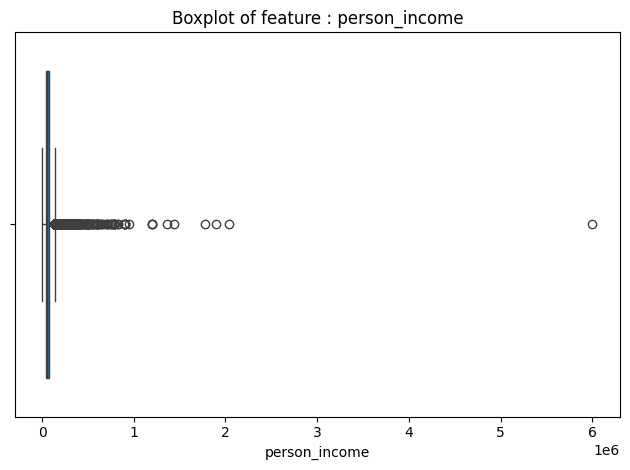

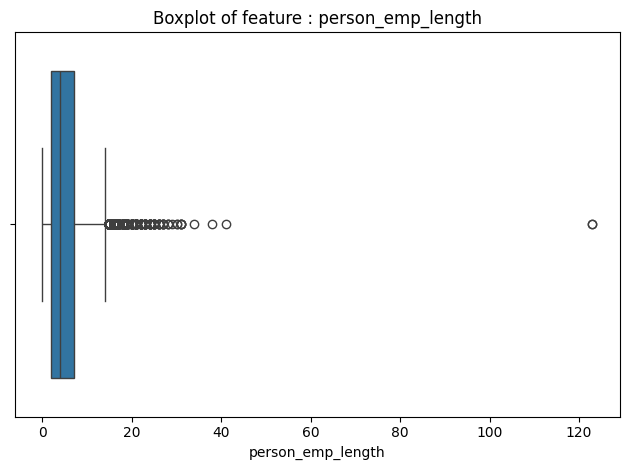

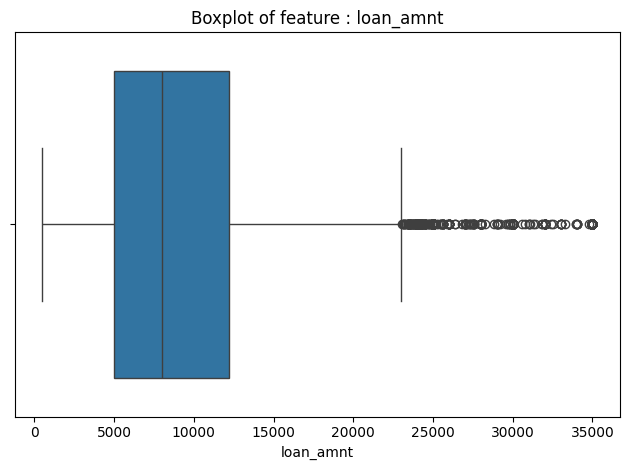

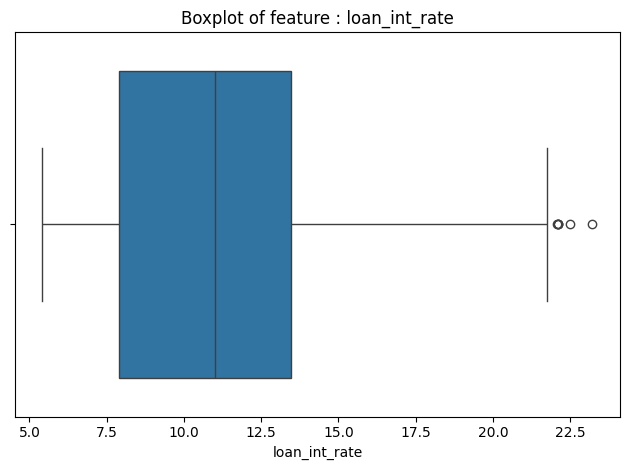

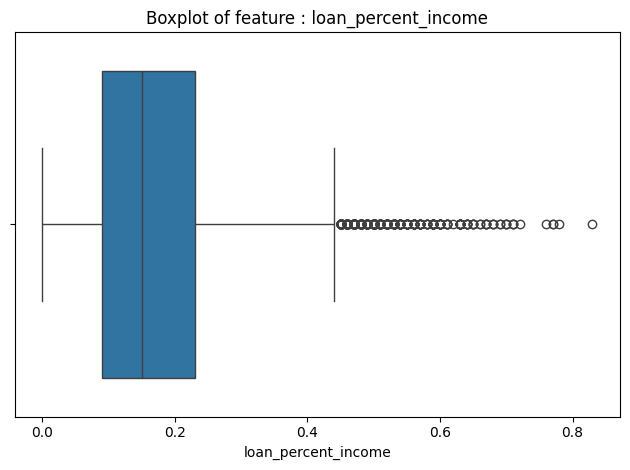

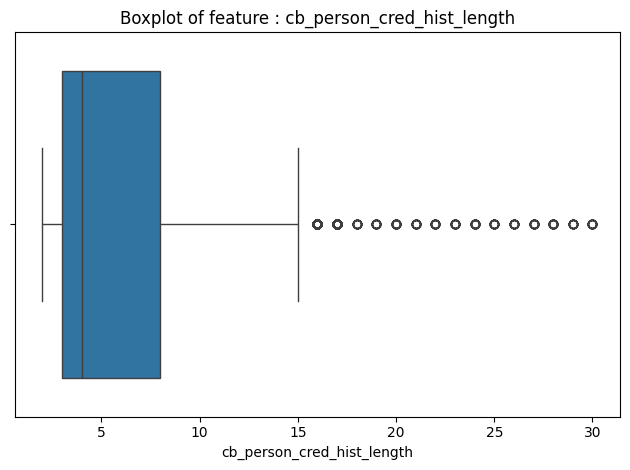

In [ ]:
# Outlier detection using boxplot
for column in df.select_dtypes(include="number").columns:
    if column == "loan_status":
        continue
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

####Feature Relationships

In [ ]:
# Check the relationship between x and y features using scatter plot
df.select_dtypes(include="number").columns # get numerical column names

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

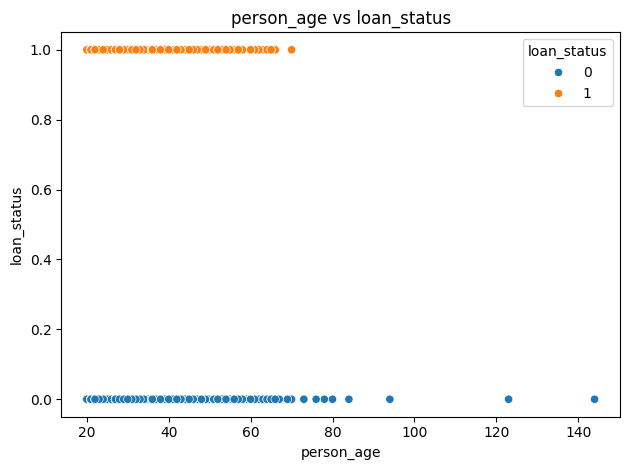

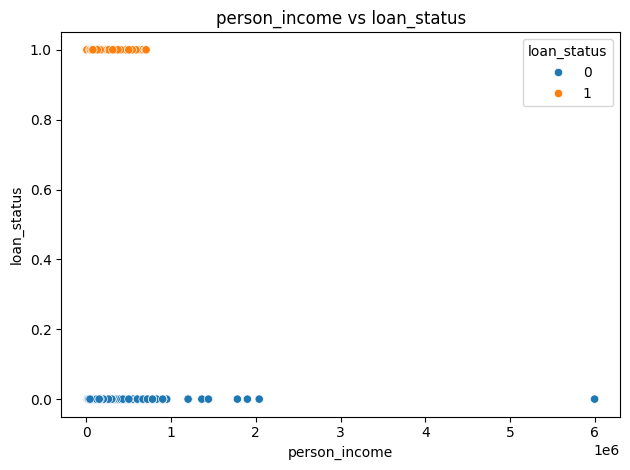

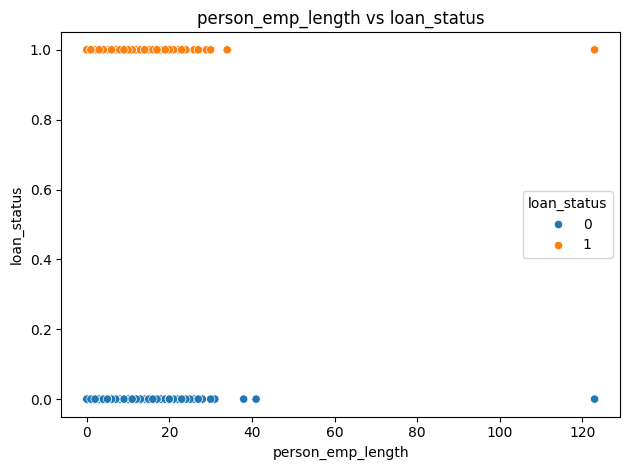

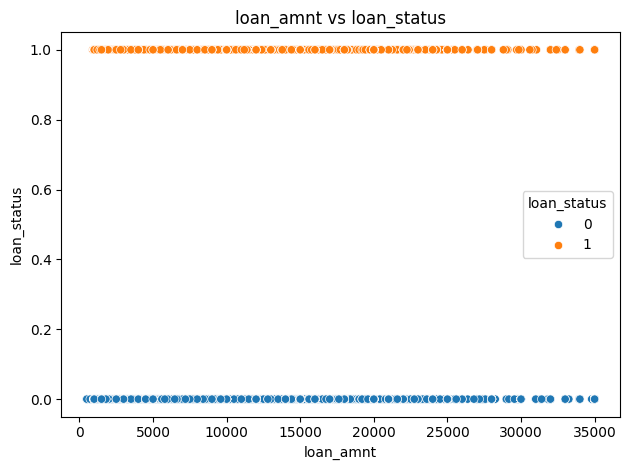

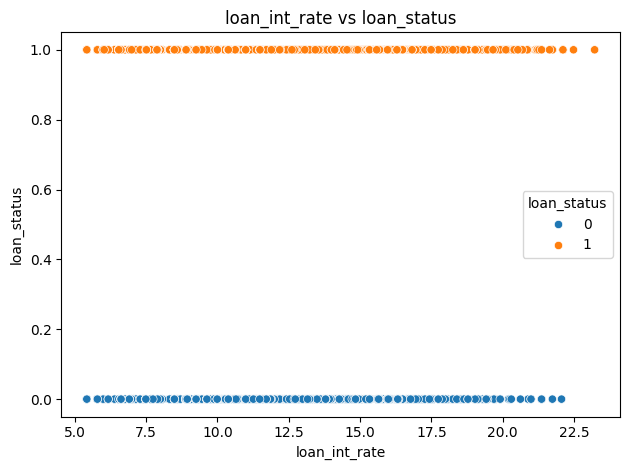

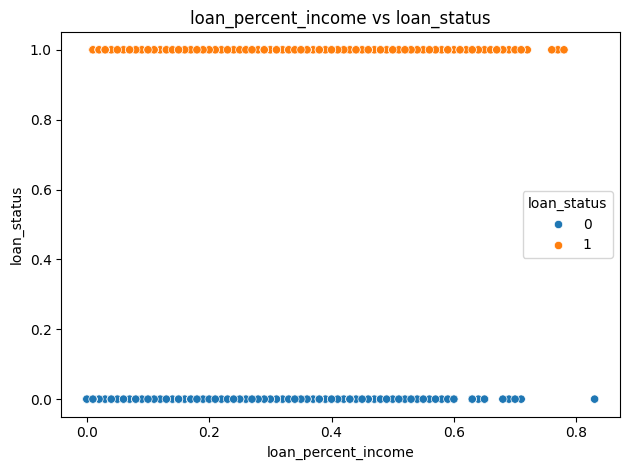

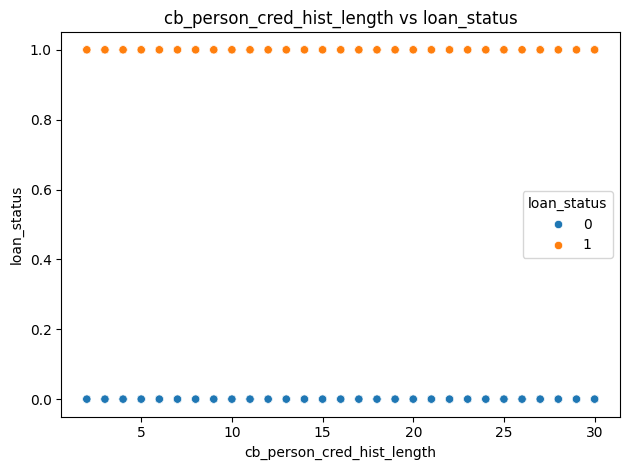

In [ ]:
# Draw scatter plot for every x and y features
x =   ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']
y = 'loan_status'

for column in x:
    sns.scatterplot(data=df, x=column, y=y, hue="loan_status")
    plt.title(f"{column} vs {y}")
    plt.tight_layout()
    plt.show()
    print("\n")



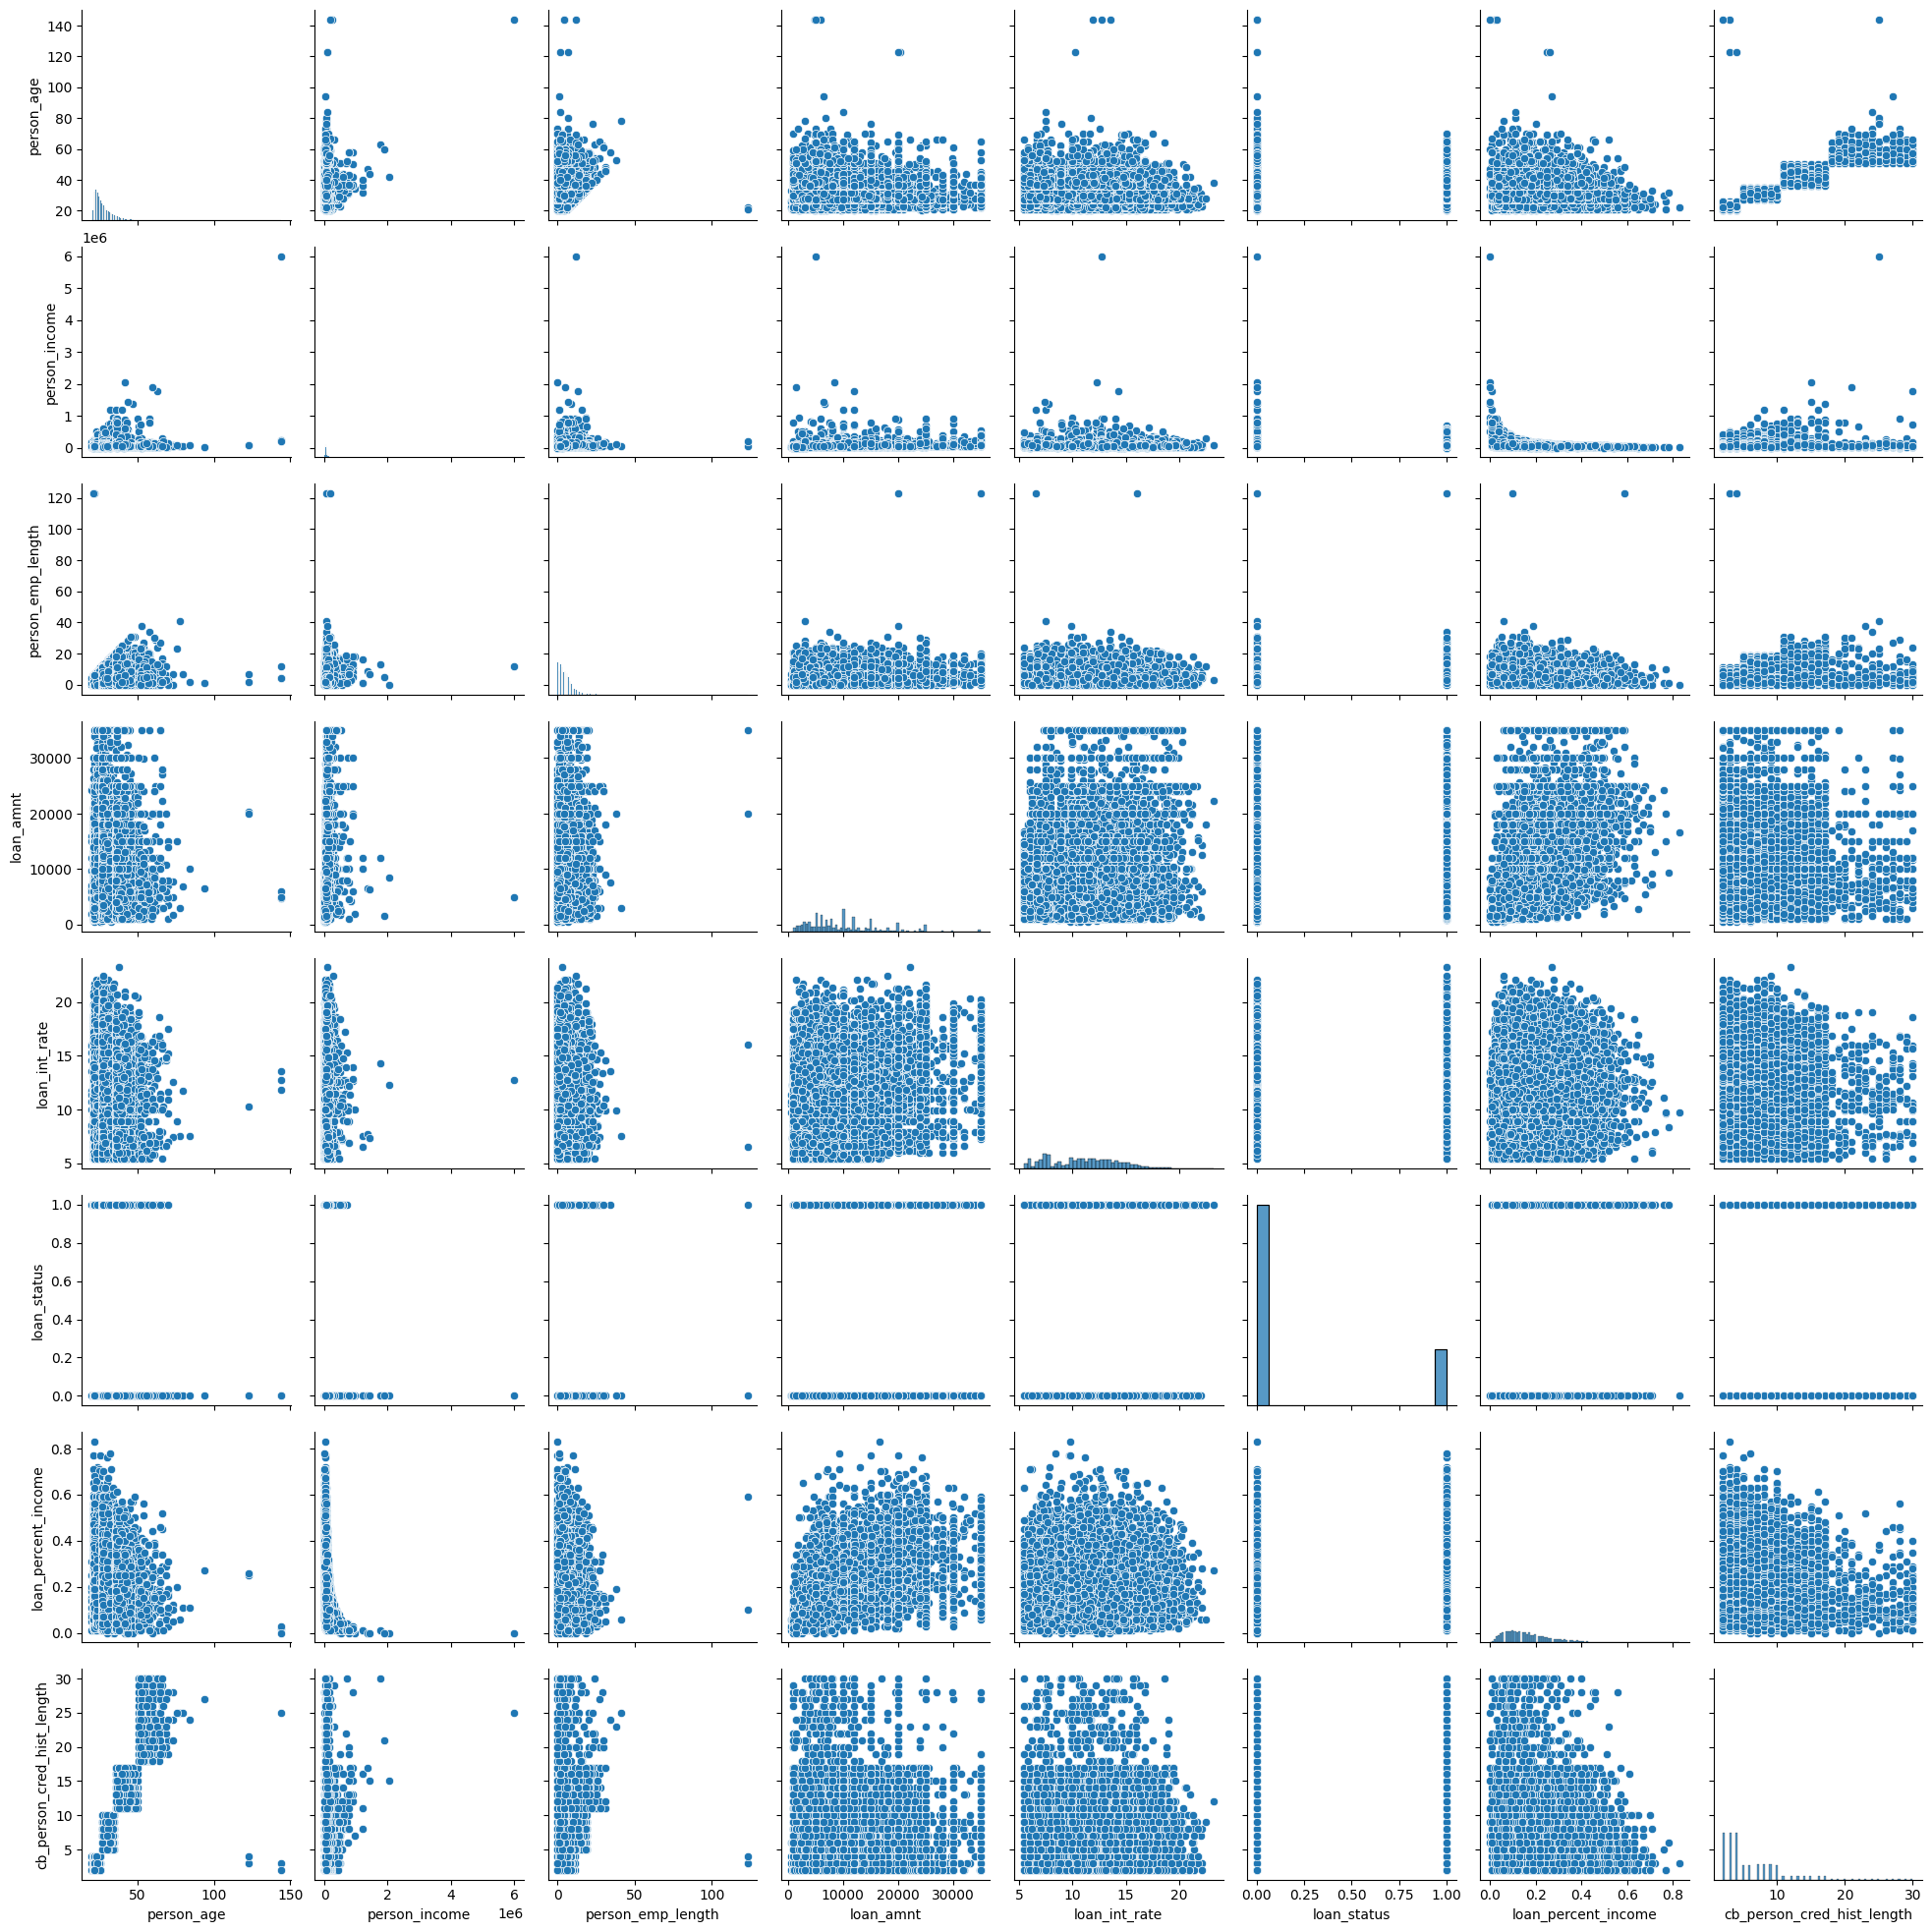

In [ ]:
# Draw scatter plot for every feature
sns.pairplot(df)
plt.show()

In [ ]:
correlation_matrix = df.select_dtypes(include="number").corr() # get correlation matrix
correlation_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


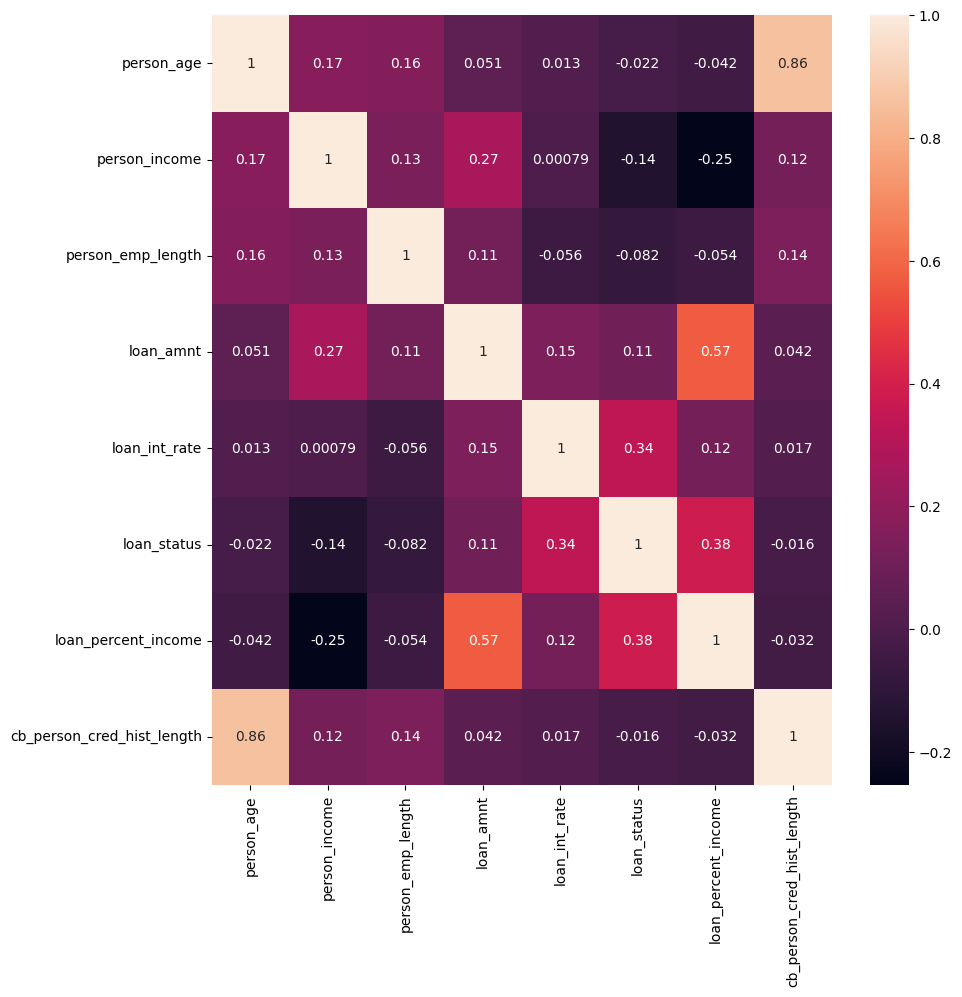

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True) # draw heatmap
plt.show()

### NaN and missing value handling

here we found that the person_emp_length column contains 2.74% nan values and loan_int_rate contains 9.56% nan values compared to our dataset size it's a very small percentage so we are going to trim the nan

In [ ]:
ndf = df.dropna() # drop nan values and save to ndf
ndf

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
ndf.isnull().sum() # check nan values after removing nan

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


### Handling Outliers

#### IQR

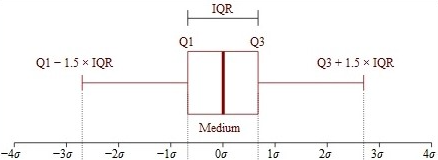

In [ ]:
# Function to get outliers using IQR method and filter out outliers or trim
def get_IQR_outliers(df, column, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask =  (df[column] < lower_bound) | (df[column] > upper_bound)
    if filter:                    # if the filter is true
        return df[~outliers_mask] # return outlier filtered dataframe
    else:                         # if the filter is false
        return df[outliers_mask]  # return dataframe of outliers





####Zscore

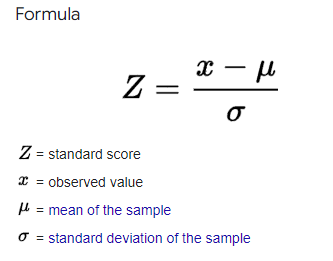

In [ ]:
# Function to get outliers using Zscore method and filter out outliers or trim
def get_zscore_outliers(df, column, threshold=3, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    x = df[column]                             # Extract the specified column from the DataFrame
    mean = x.mean()                            # Calculate the mean of the column
    standard_deviation = x.std()               # Calculate the standard deviation of the column
    z_scores = (x - mean) / standard_deviation # Calculate Z-scores for each value in the column
    outliers_mask = ((z_scores < -1* threshold) | (z_scores > threshold))
    if filter:                                 # if filter is True
        return df[~outliers_mask]              # return outlier filtered dataframe
    else:                                      # if filter is false
        return df[outliers_mask]               # return outlier dataframe

Trim outliers with IQR method on columns person_age, person_income, and person_emp_length because we found unrealistic impossible data

In [ ]:
tdf = ndf.copy()
columns = ['person_age', 'person_income', 'person_emp_length'] # 'loan_amnt', 'loan_int_rate','loan_percent_income','cb_person_cred_hist_length'
for column in columns:
    print(f"Outliers in {column} : {len(get_IQR_outliers(df=tdf, column=column, filter=False))}")
    tdf = get_IQR_outliers(df=tdf, column=column, filter=True)
    print(f"Shape after trimming {tdf.shape}")
tdf                                                              # outlier trimmed dataframe

Outliers in person_age : 1298
Shape after trimming (27340, 12)
Outliers in person_income : 1219
Shape after trimming (26121, 12)
Outliers in person_emp_length : 564
Shape after trimming (25557, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32276,38,40000,MORTGAGE,5.0,PERSONAL,A,10000,5.99,0,0.25,N,17
32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,D,8000,17.49,1,0.18,N,15
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13


## Handling duplicates

In [ ]:
tdf.duplicated().sum() # show duplicate count

129

In [ ]:
tdf.drop_duplicates(inplace=True) # drop duplicates and update df
tdf.duplicated().sum() # show duplicate count

0

In [ ]:
tdf # show df after removing duplicates

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32276,38,40000,MORTGAGE,5.0,PERSONAL,A,10000,5.99,0,0.25,N,17
32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,D,8000,17.49,1,0.18,N,15
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13


### Visualization after outlier trim and dropping duplicates

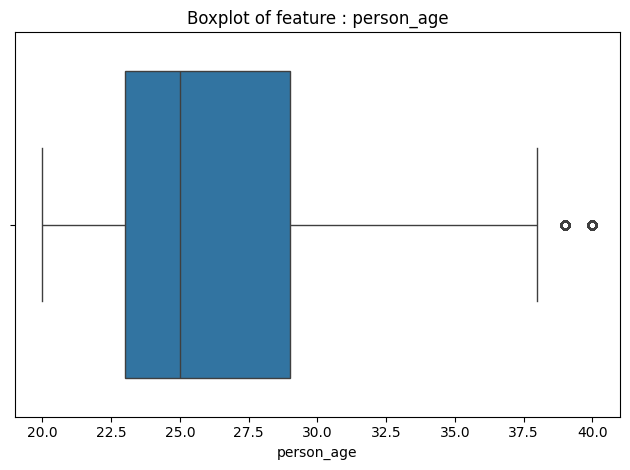

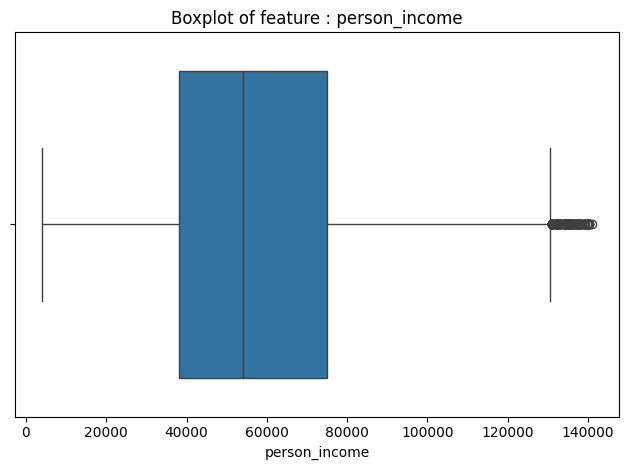

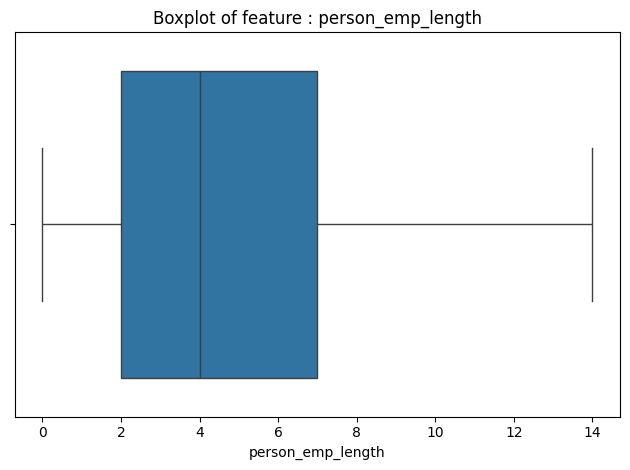

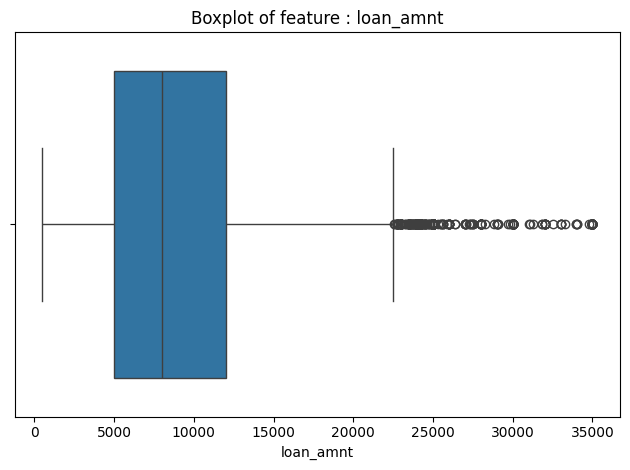

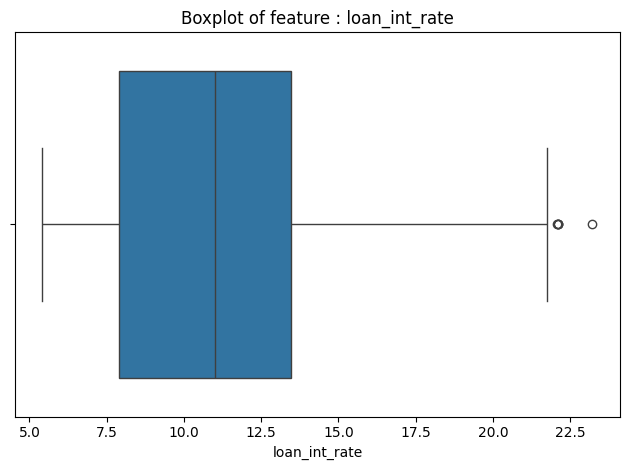

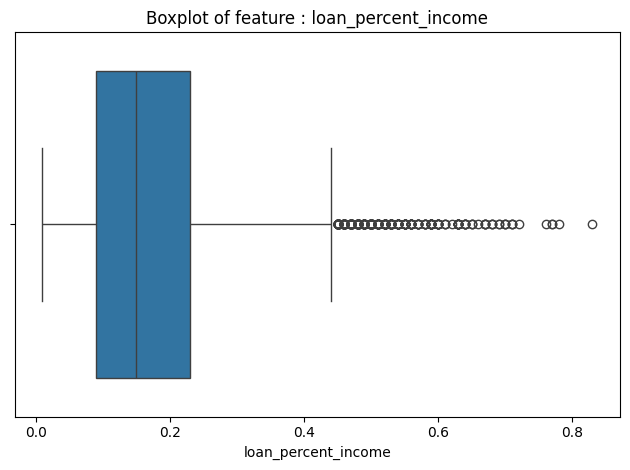

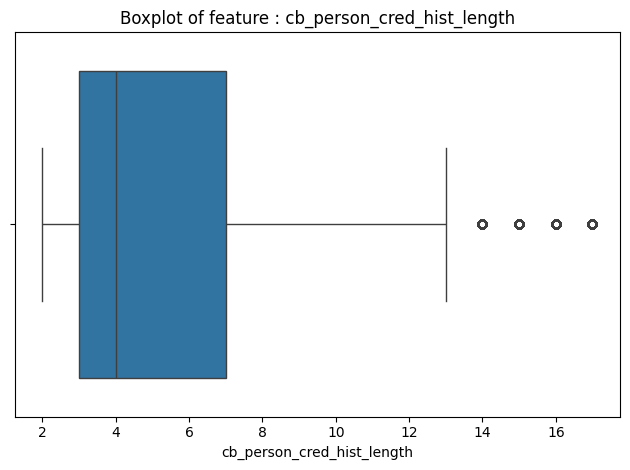

In [ ]:
# Outlier detection using boxplot after outlier trim and dropping duplicates
for column in tdf.select_dtypes(include="number").columns:
    if column == "loan_status":
        continue
    sns.boxplot(data=tdf, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

In [ ]:
tdf.describe() # show descriptive statistics after outlier trim and dropping duplicates

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,25428.000000,25428.000000,25428.000000,25428.000000,25428.000000,25428.000000,25428.000000,25428.000000
mean,26.567209,58804.614519,4.375649,9319.025287,11.041304,0.224162,0.174093,5.171818
std,4.389214,27285.443661,3.387053,6026.780250,3.220328,0.417038,0.106658,3.239914
min,20.000000,4080.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,38000.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,25.000000,54000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,29.000000,75000.000000,7.000000,12000.000000,13.480000,0.000000,0.230000,7.000000
max,40.000000,140900.000000,14.000000,35000.000000,23.220000,1.000000,0.830000,17.000000


In [ ]:
tdf.shape

(25428, 12)

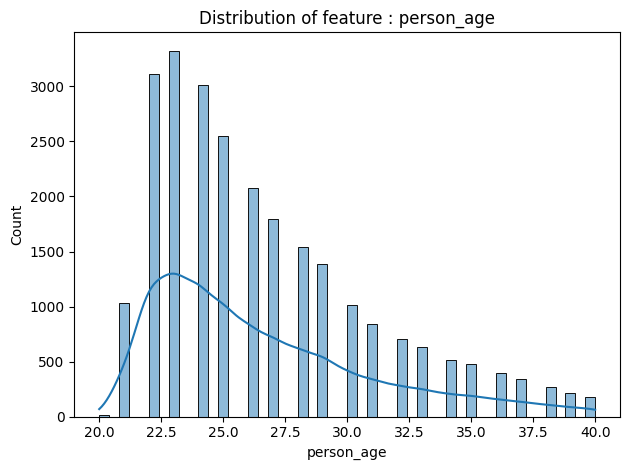

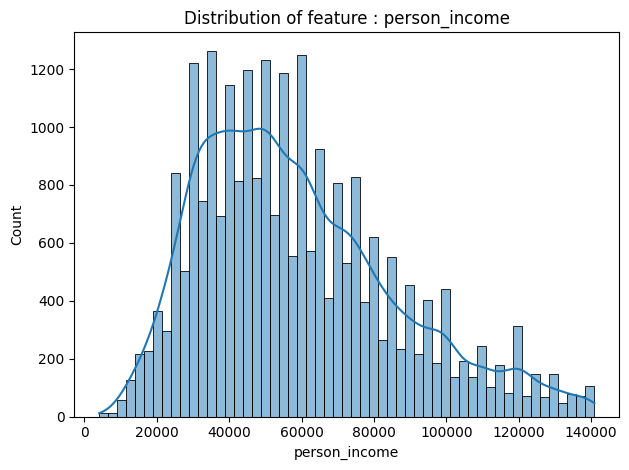

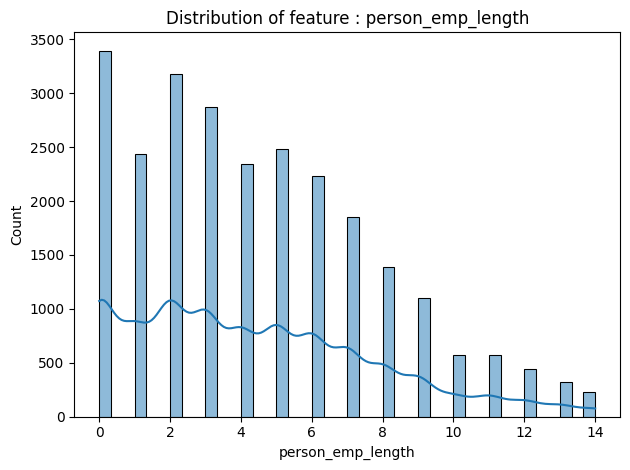

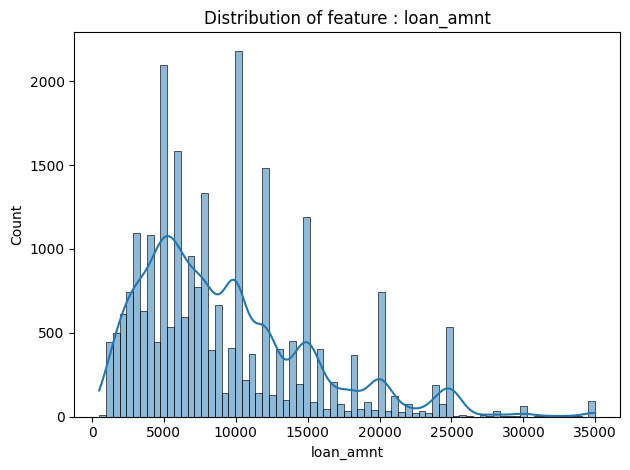

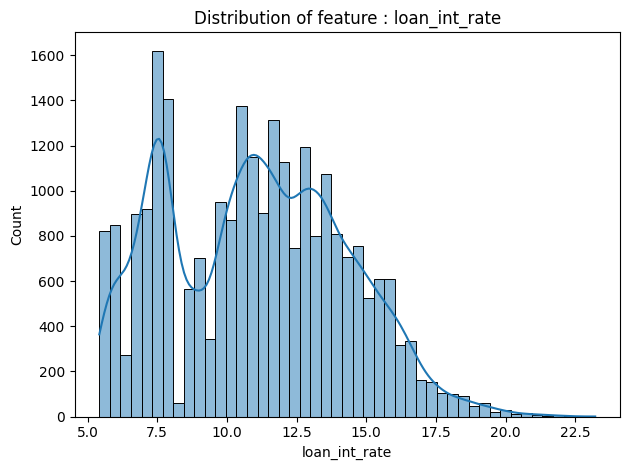

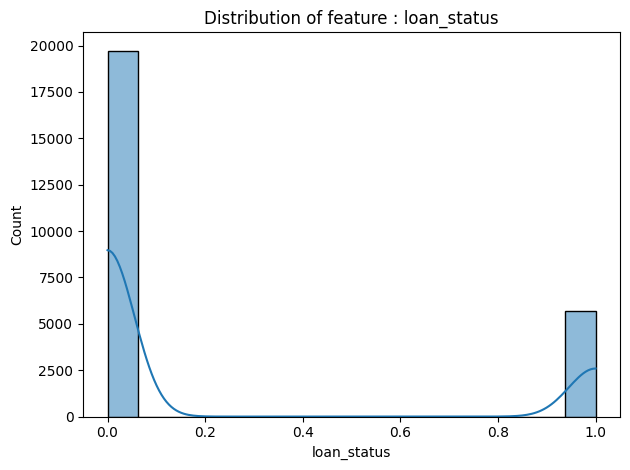

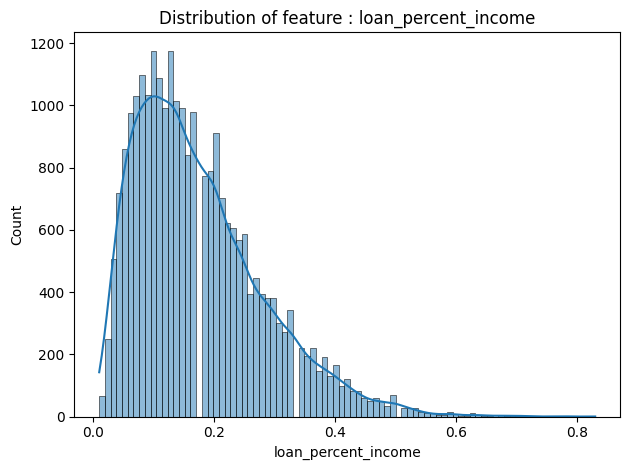

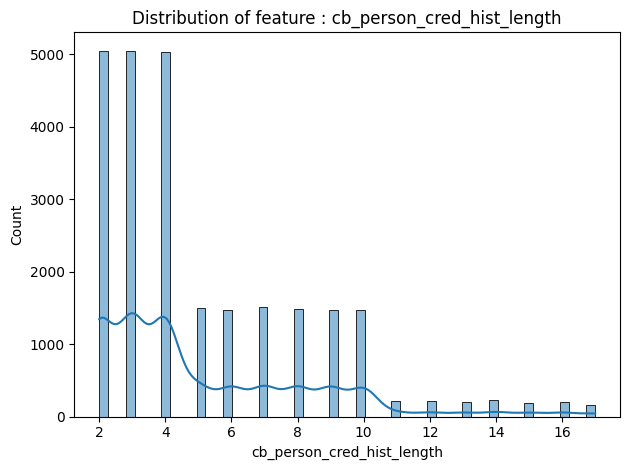

In [ ]:
# draw histplot for every numerical column to see distrubution of data after outlier trim dropping duplicates
for column in tdf.select_dtypes(include="number").columns:
    sns.histplot(data=tdf, x=column, kde=True)
    plt.title(f"Distribution of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

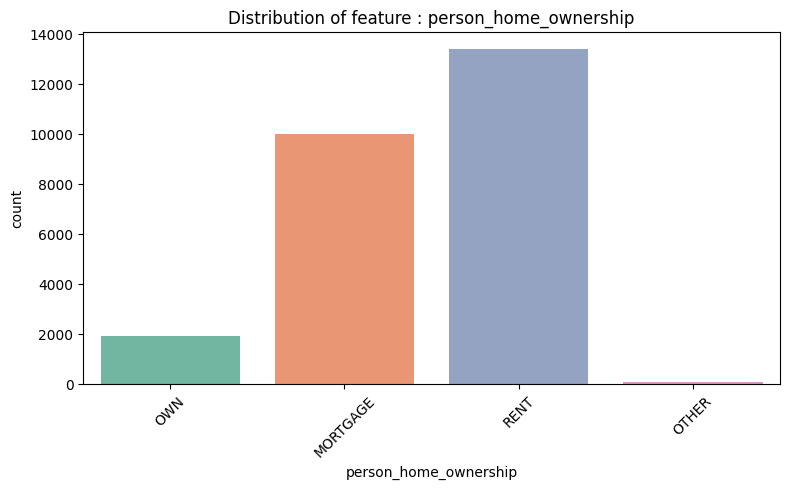

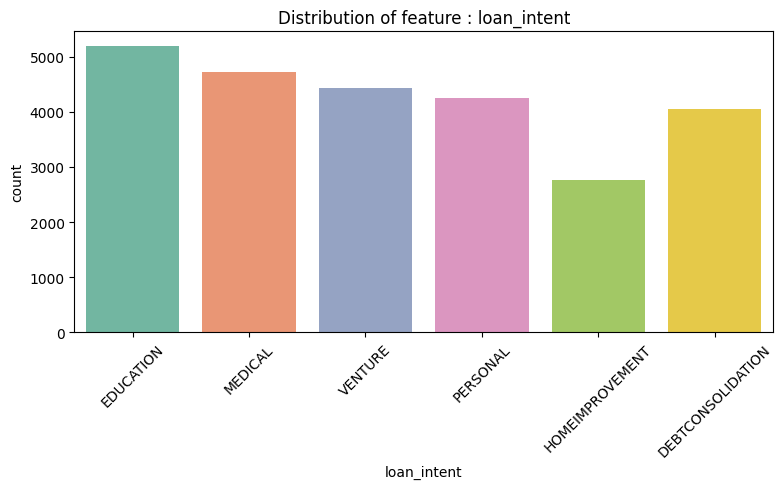

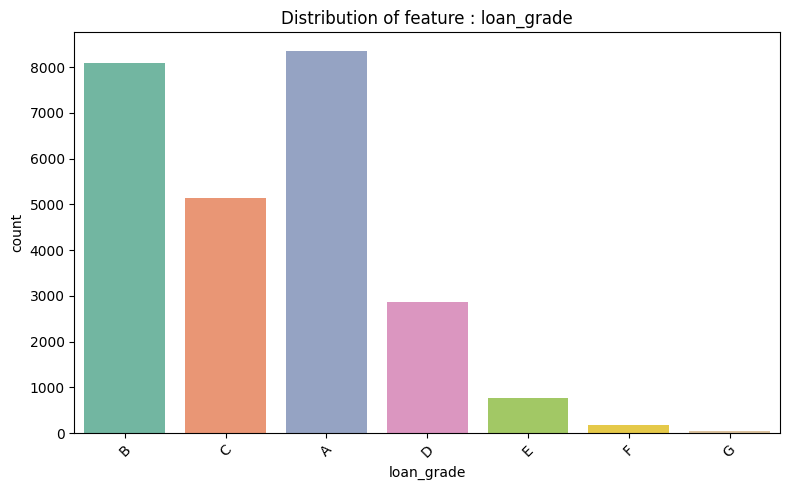

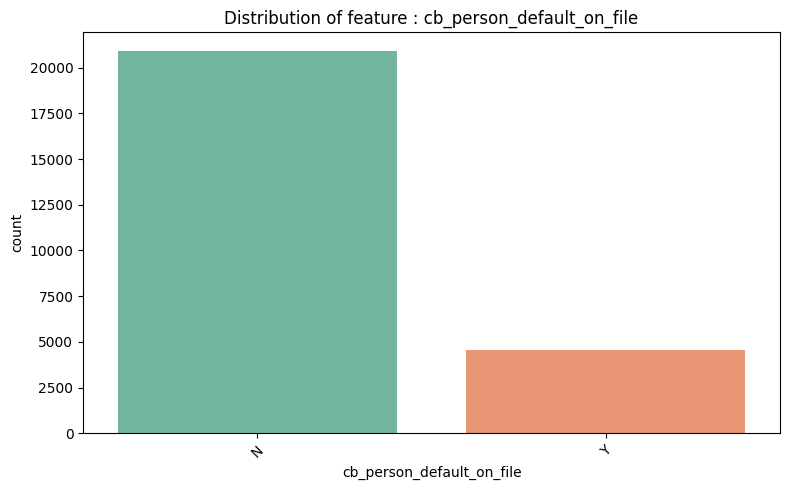

In [ ]:
#draw count plot to see distribution of categorical data after outlier trim and dropping duplicates
for column in tdf.select_dtypes(include="object").columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=tdf, x=column, hue = column, palette="Set2")
    plt.title(f"Distribution of feature : {column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")

## Encoding

In [ ]:
tdf.reset_index(drop=True, inplace=True) # reset df index


In [ ]:
tdf.info() # show data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25428 entries, 0 to 25427
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  25428 non-null  int64  
 1   person_income               25428 non-null  int64  
 2   person_home_ownership       25428 non-null  object 
 3   person_emp_length           25428 non-null  float64
 4   loan_intent                 25428 non-null  object 
 5   loan_grade                  25428 non-null  object 
 6   loan_amnt                   25428 non-null  int64  
 7   loan_int_rate               25428 non-null  float64
 8   loan_status                 25428 non-null  int64  
 9   loan_percent_income         25428 non-null  float64
 10  cb_person_default_on_file   25428 non-null  object 
 11  cb_person_cred_hist_length  25428 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.3+ MB


In [ ]:
columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'] # define categorical columns


In [ ]:
encoded_tdf = pd.get_dummies(tdf, columns=columns, drop_first=True) # encode categorical columns
encoded_tdf # show encoded dataframe

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
1,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
2,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
3,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
4,21,9900,2.0,2500,7.14,1,0.25,2,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25423,38,40000,5.0,10000,5.99,0,0.25,17,False,False,...,False,True,False,False,False,False,False,False,False,False
25424,36,44000,4.0,8000,17.49,1,0.18,15,False,False,...,False,False,False,False,False,True,False,False,False,False
25425,37,90000,11.0,4000,6.62,0,0.04,15,False,False,...,False,False,False,False,False,False,False,False,False,False
25426,38,110000,5.0,16000,11.99,0,0.15,13,False,False,...,True,False,False,True,False,False,False,False,False,False


###Scaling

In [ ]:
scaling = True # set scaling to True

In [ ]:
if scaling:
    num_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'] # define columns to scale
    std_scaler = StandardScaler() # define scaler
    encoded_tdf[num_columns] = std_scaler.fit_transform(encoded_tdf[num_columns]) # scale numerical columns
    encoded_tdf # show scaled dataframe

###Train-Test Split

#### Split x and y features

In [ ]:
x_features = encoded_tdf.drop("loan_status", axis=1) # define x features by droping y feature column 'loan_status'
y_feature = encoded_tdf["loan_status"] # define target y feature column

In [ ]:
x_features

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,-1.268409,-1.803364,0.184338,-1.380370,0.030648,-0.694693,-0.979002,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1,-0.357066,-1.803364,-0.996653,-0.633688,0.567871,3.712003,-0.670345,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,-0.812738,0.245388,-0.110909,4.261227,1.300730,3.336965,-0.979002,False,False,True,...,True,False,False,False,True,False,False,False,False,False
3,-0.584902,-0.161430,1.070081,4.261227,1.002618,3.524484,-0.361689,False,False,True,...,True,False,False,False,True,False,False,False,False,True
4,-1.268409,-1.792369,-0.701405,-1.131476,-1.211485,0.711699,-0.979002,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25423,2.604798,-0.689195,0.184338,0.112994,-1.568599,0.711699,3.650842,False,False,False,...,False,True,False,False,False,False,False,False,False,False
25424,2.149127,-0.542594,-0.110909,-0.218865,2.002536,0.055383,3.033529,False,False,True,...,False,False,False,False,False,True,False,False,False,False
25425,2.376962,1.143320,1.955825,-0.882582,-1.372963,-1.257250,3.033529,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25426,2.604798,1.876326,0.184338,1.108570,0.294602,-0.225896,2.416217,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [ ]:
y_feature

,loan_status
0,0
1,1
2,1
3,1
4,1
...,...
25423,0
25424,1
25425,0
25426,0


####Train-Test Split
Split the dataset into training and testing sets (commonly 70-30 or 80-20split).


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_feature, test_size = 0.20, random_state=42) # split dataset into training and testing sets

##Build Model

####LogisticRegression

In [ ]:
model = LogisticRegression() # define model
model.fit(x_train, y_train) # fit training data to model
y_predict = model.predict(x_test) # predict test data
y_predict_proba = model.predict_proba(x_test)[:, 1] # Predict probabilities

# print evaluation matrics
print(f"Accuracy: {accuracy_score(y_test, y_predict)}")
print(f"Precision: {precision_score(y_test, y_predict)}")
print(f"Recall: {recall_score(y_test, y_predict)}")
print(f"F1 Score: {f1_score(y_test, y_predict)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_predict_proba)}")

Accuracy: 0.8698387731026347
Precision: 0.7631578947368421
Recall: 0.5944741532976827
F1 Score: 0.6683366733466933
ROC AUC: 0.8821548571726645


####DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier() # define model
model.fit(x_train, y_train) # fit training data to model
y_predict = model.predict(x_test) # predict test data
y_predict_proba = model.predict_proba(x_test)[:, 1] # Predict probabilities

# print evaluation matrics
print(f"Accuracy: {accuracy_score(y_test, y_predict)}")
print(f"Precision: {precision_score(y_test, y_predict)}")
print(f"Recall: {recall_score(y_test, y_predict)}")
print(f"F1 Score: {f1_score(y_test, y_predict)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_predict_proba)}")

Accuracy: 0.891663389697208
Precision: 0.7446443873179092
Recall: 0.7745098039215687
F1 Score: 0.7592835299257317
ROC AUC: 0.8496666073089175


####RandomForestClassifier

In [ ]:
model = RandomForestClassifier() # define model
model.fit(x_train, y_train) # fit training data to model
y_predict = model.predict(x_test) # predict test data
y_predict_proba = model.predict_proba(x_test)[:, 1] # Predict probabilities

# print evaluation matrics
print(f"Accuracy: {accuracy_score(y_test, y_predict)}")
print(f"Precision: {precision_score(y_test, y_predict)}")
print(f"Recall: {recall_score(y_test, y_predict)}")
print(f"F1 Score: {f1_score(y_test, y_predict)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_predict_proba)}")

Accuracy: 0.9345261502162799
Precision: 0.9571263035921205
Recall: 0.7361853832442068
F1 Score: 0.832241813602015
ROC AUC: 0.9318512332921427
